In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import product

In [ ]:
def get_classification(i,j,stepsize, X, y, classifiers,texts):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, stepsize),
                       np.arange(y_min, y_max, stepsize))

  f, axarr = plt.subplots(i,j, sharex='col', sharey='row', figsize=(10, 8))

  for idx, clf, tt in zip(product([0, i-1], [0, j-1]),
                          classifiers,
                          texts):
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
      axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                    s=20, edgecolor='k')
      axarr[idx[0], idx[1]].set_title(tt)

  plt.show()
  return classifiers

In [ ]:
def report_classification( X, y,classifiers,texts):
  from sklearn.metrics import accuracy_score
  results = {}
  for clf, tt in zip(     classifiers,
                          texts):
      y_pred = clf.predict(X)
      results[tt] = accuracy_score(y, y_pred)


  return results

## Get  Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = data.data
y = data.target

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,0:2], y, test_size = 0.1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
classifiers = [
    DecisionTreeClassifier(max_depth=4).fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train),
    SVC(gamma=.1, kernel='rbf', probability=True).fit(X_train, y_train),
    LogisticRegression().fit(X_train, y_train)
    ]
texts = [    "DecisionTreeClassifier",
              "KNeighborsClassifier",
              "SVC",
              "LogisticRegression"]

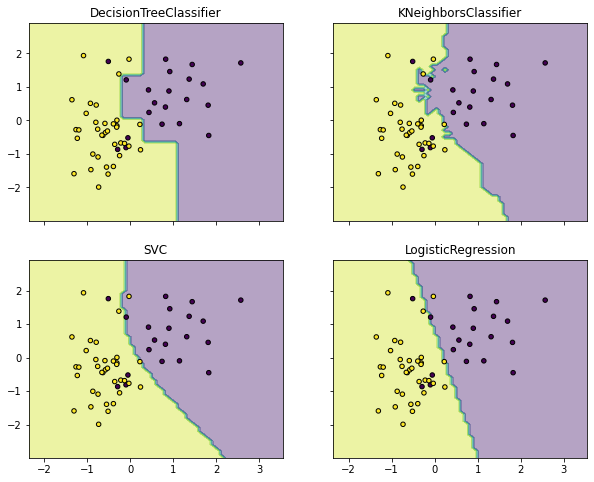

In [ ]:
classifiers = get_classification(2,2,0.1, X_test, y_test, classifiers, texts)

In [ ]:
report_classification( X_test, y_test,classifiers,texts)

{'DecisionTreeClassifier': 0.9122807017543859,
 'KNeighborsClassifier': 0.9298245614035088,
 'LogisticRegression': 0.9122807017543859,
 'SVC': 0.9122807017543859}